In [9]:
!pip install tensorflow

    100% |████████████████████████████████| 45.9MB 30kB/s  eta 0:00:01
    100% |████████████████████████████████| 81kB 11.3MB/s ta 0:00:01
    100% |████████████████████████████████| 7.5MB 187kB/s eta 0:00:01
    100% |████████████████████████████████| 3.1MB 465kB/s eta 0:00:01
    100% |████████████████████████████████| 890kB 1.6MB/s eta 0:00:01
    100% |████████████████████████████████| 81kB 11.7MB/s ta 0:00:01
  Running setup.py bdist_wheel for gast ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/8e/fa/d6/77dd17d18ea23fd7b860e02623d27c1be451521af40dd4a13e
  Running setup.py bdist_wheel for termcolor ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/de/f7/bf/1bcac7bf30549e6a4957382e2ecab04c88e513117207067b03
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/76/f7/0c/88796d7212af59bb2f496b12267e0605f205170781e9b86479
  Running setup.py bdist_wheel for html5lib ... done
  Stored in directory: /home/ub

In [11]:
!pip install keras

    100% |████████████████████████████████| 337kB 3.5MB/s eta 0:00:01


In [33]:
!pip install -q --upgrade tensorflow

In [3]:
!pip install dask --upgrade

    100% |████████████████████████████████| 583kB 2.2MB/s eta 0:00:01
  Found existing installation: dask 0.15.3
    Uninstalling dask-0.15.3:
      Successfully uninstalled dask-0.15.3


### Important imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightkurve import KeplerTargetPixelFile
import csv
from tqdm import tqdm
import tensorflow as tf
import keras
from sklearn import metrics
from keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.7.0
Eager execution: True


- Load in x and y vectors from files
- y must be converted to categorical

In [13]:
X_train = np.load('xtrainfile2.npy').reshape(5725, 1, 1626).astype('float32')
X_test = np.load('xtestfile2.npy').reshape(2160, 1, 1626).astype('float32')
Y_train = np.load('ytrainfile2.npy')
Y_test = np.load('ytestfile2.npy')

In [14]:
# y needs to be categorical
y_trainbinary = to_categorical(Y_train)
y_testbinary = to_categorical(Y_test)

- Find the shapes of each vector, as confirmation

In [15]:
print("X_train: "+str(X_train.shape))
print("y_trainbinary: "+str(y_trainbinary.shape))
print("----")
print("X_test: "+str(X_test.shape))
print("y_testbinary: "+str(y_testbinary.shape))

X_train: (5725, 1, 1626)
y_trainbinary: (5725, 2)
----
X_test: (2160, 1, 1626)
y_testbinary: (2160, 2)


In [30]:
X_train

array([[[0.99901456, 0.99931747, 0.9984102 , ..., 0.9997821 ,
         1.0010506 , 1.0008373 ]],

       [[0.99901456, 0.99931747, 0.9984102 , ..., 0.9997821 ,
         1.0010506 , 1.0008373 ]],

       [[1.0051923 , 1.0036092 , 1.0033753 , ..., 0.9927544 ,
         0.9935881 , 0.99231523]],

       ...,

       [[0.9997914 , 1.0000747 , 0.9999657 , ..., 1.0004965 ,
         0.9999225 , 0.99977523]],

       [[1.0004292 , 0.9997566 , 1.001402  , ..., 1.0006493 ,
         1.0006902 , 0.99959934]],

       [[1.0000124 , 0.9999862 , 1.0001131 , ..., 0.9997616 ,
         0.99982774, 1.0001394 ]]], dtype=float32)

# Start TensorFlow

- Initialize variables and placeholders

In [152]:
X = tf.placeholder(tf.float32, shape=(None, 1626, 1))

w1 = tf.Variable(tf.zeros([1626, 1000]))
w2 = tf.Variable(tf.zeros([1000, 100]))
w3 = tf.Variable(tf.zeros([100, 10]))
w4 = tf.Variable(tf.zeros([10, 2]))

b1 = tf.Variable(tf.zeros([1000]))
b2 = tf.Variable(tf.zeros([100]))
b3 = tf.Variable(tf.zeros([10]))
b4 = tf.Variable(tf.zeros([2]))

init = tf.global_variables_initializer()


# not sure if I need this, but just in case
X = tf.reshape(X, [-1, 1626])

Y1 = tf.nn.sigmoid(tf.matmul(X, w1) + b1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, w2) + b2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, w3) + b3)
Ypredicted = tf.nn.softmax(tf.matmul(Y3, w4) + b4)


Y_ = tf.placeholder(tf.float32, shape=(None, 1))

- Define optimizers and learning rates

In [ ]:
cross_entropy = -(tf.reduce_sum(Y_*tf.log(Ypredicted)))
is_correct = tf.equal(tf.argmax(Ypredicted, 1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

- Start the Tensorflow Session

In [153]:
sess = tf.Session()
sess.run(init)

- Test and train simultaneously with 60 epochs

In [159]:
for i in tqdm(range(60)):
    train_data = {X:X_train, Y_:y_train}
    sess.run(train_step, feed_dict=train_data)
    a,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    print(is_correct)
    test_data = {X:X_test, Y_:y_test}
    a,c = sess.run([accuracy, cross_entropy], feed_dict=test_data)

  5%|▌         | 3/60 [00:00<00:05,  9.55it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


  8%|▊         | 5/60 [00:00<00:05, 10.35it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 15%|█▌        | 9/60 [00:00<00:04, 10.93it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 18%|█▊        | 11/60 [00:00<00:04, 11.06it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 25%|██▌       | 15/60 [00:01<00:04, 11.23it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 28%|██▊       | 17/60 [00:01<00:03, 11.29it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 35%|███▌      | 21/60 [00:01<00:03, 11.35it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 38%|███▊      | 23/60 [00:02<00:03, 11.37it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 45%|████▌     | 27/60 [00:02<00:02, 11.41it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 48%|████▊     | 29/60 [00:02<00:02, 11.42it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 55%|█████▌    | 33/60 [00:02<00:02, 11.44it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 58%|█████▊    | 35/60 [00:03<00:02, 11.44it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 65%|██████▌   | 39/60 [00:03<00:01, 11.45it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 68%|██████▊   | 41/60 [00:03<00:01, 11.46it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 75%|███████▌  | 45/60 [00:03<00:01, 11.48it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 78%|███████▊  | 47/60 [00:04<00:01, 11.50it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 85%|████████▌ | 51/60 [00:04<00:00, 11.52it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 88%|████████▊ | 53/60 [00:04<00:00, 11.52it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


 95%|█████████▌| 57/60 [00:04<00:00, 11.53it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


100%|██████████| 60/60 [00:05<00:00, 11.54it/s]

Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)
Tensor("Equal_18:0", shape=(?,), dtype=bool)


- Define function that returns error and confusions
- This will be useful for creating the confusion matrix

In [161]:
def error_rate(predictions, labels):
    """Return the error rate and confusions."""
    is_correct = tf.equal(tf.argmax(Ypredicted, 1), tf.argmax(Y_,1))
    correct = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
    total = predictions.shape[0]

    error = 100.0 - (100 * float(correct) / float(total))

    confusions = np.zeros([10, 10], np.float32)
    bundled = zip(np.argmax(predictions, 1), np.argmax(labels, 1))
    for predicted, actual in bundled:
        confusions[predicted, actual] += 1
    
    return error, confusions

print('Done')

Done


- Print Confusion Matrix and Test Error

Test error: 0.0%


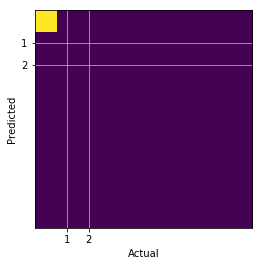

In [162]:
test_error, confusions = error_rate(Ypredicted.eval(session=sess, feed_dict=test_data), y_test)
print('Test error: %.1f%%' % test_error)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.xticks(np.arange(1,3, dtype=int))
plt.yticks(np.arange(1,3, 1, dtype=int))
plt.imshow(confusions); #cmap=plt.cm.jet, interpolation='nearest');

#for i, cas in enumerate(confusions):
 #   for j, count in enumerate(cas):
  #      if count > 0:
  #          xoff = .07 * len(str(count))
   #         plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')

In [147]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Reds):

    print(cm)

    plt.imshow(cm, cmap=cmap)#interpolation='nearest'
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

Model accuracy: 100.00%


ValueError: Classification metrics can't handle a mix of unknown and binary targets

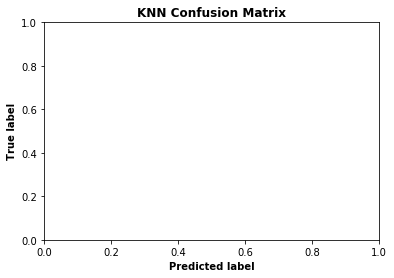

In [151]:
plt.tight_layout()
plt.title("KNN Confusion Matrix", fontweight="bold")
plt.ylabel('True label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold')

train_error, confus = error_rate(Ypredicted.eval(session=sess, feed_dict=train_data), y_test)
print("Model accuracy: {:.2f}%".format(train_error))
plot_confusion_matrix(metrics.confusion_matrix((y_test,Ypredicted), ['absent', 'present']))

In [46]:
# background investigating

# Keras Model 1

In [79]:
from __future__ import division

import numpy as np
import os
import tempfile
import keras
from keras import backend as K
import tensorflow as tf

np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.utils import to_categorical

- Test for correct backend

In [80]:
if K.backend() != 'tensorflow':
    raise RuntimeError('This example can only run with the TensorFlow backend,'
                       ' because it requires the Datset API, which is not'
                       ' supported on other platforms.')

- Construct model

In [81]:
# from the keras tutorial:
model2 = Sequential()

model2.add(Dense(2, input_shape=(1626, 1)))

model2.add(Flatten())

model2.add(Dense(3000, activation='sigmoid'))

#model.add(Dropout(0.25))

model2.add(Dense(300, activation='sigmoid'))
model2.add(Dense(30, activation='sigmoid'))
#model.add(Dropout(0.5))

model2.add(Dense(2, activation='softmax'))

- Compile model, define loss, optimizer, and metrics

In [82]:
# still from the keras tutorial
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

* Show model architecture and outputs for each layer

In [83]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1626, 2)           4         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3252)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 3000)              9759000   
_________________________________________________________________
dense_28 (Dense)             (None, 300)               900300    
_________________________________________________________________
dense_29 (Dense)             (None, 30)                9030      
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 62        
Total params: 10,668,396
Trainable params: 10,668,396
Non-trainable params: 0
________________________________________________________________

- Fit model to training data

In [84]:
# throws an error, out of memory
model2.fit(X_train, y_trainbinary, 
          batch_size=16, nb_epoch=16, verbose=1)

Epoch 1/16
5725/5725 [==============================] - 44s 8ms/step - loss: 0.6830 - acc: 0.5843
Epoch 2/16
5725/5725 [==============================] - 44s 8ms/step - loss: 0.6805 - acc: 0.5857
Epoch 3/16
5725/5725 [==============================] - 44s 8ms/step - loss: 0.6800 - acc: 0.5857
Epoch 4/16
5725/5725 [==============================] - 43s 8ms/step - loss: 0.6787 - acc: 0.5857
Epoch 5/16
5725/5725 [==============================] - 43s 8ms/step - loss: 0.6796 - acc: 0.5857
Epoch 6/16
5725/5725 [==============================] - 44s 8ms/step - loss: 0.6794 - acc: 0.5857
Epoch 7/16
5725/5725 [==============================] - 44s 8ms/step - loss: 0.6802 - acc: 0.5857
Epoch 8/16
5725/5725 [==============================] - 43s 8ms/step - loss: 0.6792 - acc: 0.5857
Epoch 9/16
5725/5725 [==============================] - 43s 8ms/step - loss: 0.6799 - acc: 0.5857
Epoch 10/16
5725/5725 [==============================] - 43s 8ms/step - loss: 0.6802 - acc: 0.5857
Epoch 11/16
5725/57

- Evaluate model based on accuracy with the test set

In [85]:
model2.evaluate(X_test, y_testbinary, verbose=True)

2160/2160 [==============================] - 1s 540us/step


[0.81629329389996, 0.24305555555555555]

# Keras Model 2 
## (includes decaying learning rate)

In [11]:
from __future__ import division

import numpy as np
import os
import tempfile
import keras
from keras import backend as K
import tensorflow as tf

np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

- Test for correct backend

In [12]:
if K.backend() != 'tensorflow':
    raise RuntimeError('This example can only run with the TensorFlow backend,'
                       ' because it requires the Datset API, which is not'
                       ' supported on other platforms.')

- Construct model

In [15]:
# from the keras tutorial:

# Keras 1D convolution!!!!!

model3 = Sequential()

model3.add(Dense(1600, input_shape=(1, 1626), activation='sigmoid'))

model3.add(Flatten())

model3.add(Dense(1000, activation='linear')) # probably want linear or relu?

#model.add(Dropout(0.25))

model3.add(Dense(300, activation='sigmoid'))
model3.add(Dense(30, activation='sigmoid')) # whatever layer feeds to your output layer should be linear
#model.add(Dropout(0.5))

model3.add(Dense(2, activation='softmax')) # or sigmoid? which is more standard

RuntimeError: tf.placeholder() is not compatible with eager execution.

- Visualization: shows each layer in the model, and its output

In [21]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1, 1626)           2645502   
_________________________________________________________________
flatten_3 (Flatten)          (None, 1626)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1627000   
_________________________________________________________________
dense_13 (Dense)             (None, 300)               300300    
_________________________________________________________________
dense_14 (Dense)             (None, 30)                9030      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 62        
Total params: 4,581,894
Trainable params: 4,581,894
Non-trainable params: 0
_________________________________________________________________


In [22]:
## from the online resource (to get a decaying learning rate)

# Compile model
#epochs = 10
#learning_rate = 0.01
#decay_rate = learning_rate / epochs
#momentum = 0.8
#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

- Train the model

In [10]:
# Fit the model
model3.fit(X_train, y_trainbinary, epochs=epochs, batch_size=28, validation_data=(X_test, y_testbinary))

NameError: name 'model3' is not defined

- Evaluate the model on test data

In [78]:
model3.evaluate(X_test, y_testbinary, verbose=True)

2160/2160 [==============================] - 1s 536us/step


[0.7850716997075964, 0.24305555555555555]

In [ ]:
random forest with percentiles
min value
max value
first percentile
99th percentile

# Keras 3 (tensorboard tutorial)

In [21]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

#tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.7.0
Eager execution: True


In [104]:
print(labels)

tf.Tensor(1, shape=(), dtype=int64)


In [46]:
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

def grad(model, inputs, targets):
    with tfe.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, model.variables)

In [111]:
labels.shape

(7888, 1)

In [110]:
features = np.load('xtrainfile2.npy').reshape(5725, 1, 1626).astype('float32')
features_to_test = np.load('xtestfile2.npy').reshape(2160, 1, 1626).astype('float32')
labels = to_categorical(np.load('ytrainfile3.npy').reshape(5725, 1, 1))
labels_to_test = to_categorical(np.load('ytestfile3.npy').reshape(2160, 1, 1))

ValueError: zero-size array to reduction operation maximum which has no identity

In [96]:
#features = np.load("/home/ubuntu/Puryear_Metis/Project5/xtrainfile2.npy")
#labels = to_categorical(np.load("/home/ubuntu/Puryear_Metis/Project5/ytrainfile2.npy"))


# Assume that each row of `features` corresponds to the same row as `labels`.
assert features.shape[0] == labels.shape[0]

train_dataset = tf.data.Dataset.from_tensor_slices((features, labels))

In [105]:
# from the tensorboard tutorial

model = tf.keras.Sequential([tf.keras.layers.Dense(1626, activation="relu", input_shape=(1,1626)),  # input shape required
                             tf.keras.layers.Dense(1000, activation="relu"),
                             tf.keras.layers.Dense(300, activation= 'linear'),
                             tf.keras.layers.Dense(30, activation='sigmoid'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [106]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             ?                         2645502   
_________________________________________________________________
dense_70 (Dense)             ?                         1627000   
_________________________________________________________________
dense_71 (Dense)             ?                         300300    
_________________________________________________________________
dense_72 (Dense)             ?                         9030      
_________________________________________________________________
dense_73 (Dense)             ?                         31        
Total params: 4,581,863
Trainable params: 4,581,863
Non-trainable params: 0
_________________________________________________________________


In [107]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [108]:
## Note: Rerunning this cell uses the same model variables
#import tensorflow.contrib.eager as tfe
#tf.enable_eager_execution()

# keep results for plotting
train_loss_results = []
train_accuracy_results = []
#train_dataset = {x:X_train, y:y_trainbinary}

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
for features, labels in tfe.Iterator(train_dataset):
    # Optimize the model
    grads = grad(model, features,labels)
    optimizer.apply_gradients(zip(grads, model.variables),
                              global_step=tf.train.get_or_create_global_step())

    # Track progress
    epoch_loss_avg(loss(model, features, labels))  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(features), axis=1, output_type=tf.int32), labels)

  # end epoch
train_loss_results.append(epoch_loss_avg.result())
train_accuracy_results.append(epoch_accuracy.result())

if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

InvalidArgumentError: Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 1 [Op:SparseSoftmaxCrossEntropyWithLogits] name: xentropy

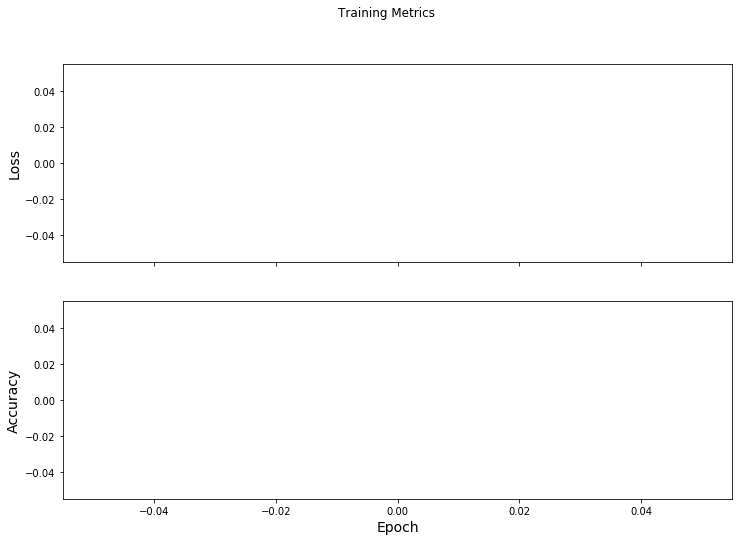

In [89]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()